In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
from sklearn import metrics
%matplotlib inline


In [61]:
credit = pd.read_csv("C:/HIRAL VASHI/COMODO/Data Science/netflow_day-02.csv",sep=",",index_col=False, nrows=500)

In [75]:
credit.head(500)

,time,duration,srcDevice,dstDevice,protocol,srcPort,dstPort,srcPackets,dstPackets,srcBytes,dstBytes
0,118781,5580,Comp364445,Comp547245,17,Port05507,Port46272,0,755065,0,1042329018
1,118783,6976,Comp450942,Comp829338,6,Port03137,445,1665,1108,300810,250408
2,118785,14178,IP564116,Comp141988,17,5060,5060,1866,0,1477041,0
3,118785,28147,IP564116,Comp141988,17,5060,5060,3326,0,2656305,0
4,118785,48507,IP564116,Comp141988,17,5060,5060,5423,0,4388449,0
5,118785,63173,IP564116,Comp141988,17,5060,5060,7061,0,5745536,0
6,118785,78594,IP564116,Comp141988,17,5060,5060,8638,0,7052947,0
7,118785,90763,IP564116,Comp141988,17,5060,5060,9943,0,8105139,0
8,118785,104427,IP564116,Comp141988,17,5060,5060,11544,0,9398696,0
9,118785,115677,IP564116,Comp141988,17,5060,5060,13011,0,10586412,0


In [76]:
X = credit[[' srcPackets',' dstPackets',' srcBytes',' dstBytes']]

In [77]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X))

In [78]:
X_normalized.columns = [' srcPackets',' dstPackets',' srcBytes',' dstBytes']

In [79]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_normalized)
y_kmeans = kmeans.predict(X_normalized)

In [80]:
centers = kmeans.cluster_centers_
print('Cluster center:\n')
print(pd.DataFrame(centers,columns= [' srcPackets',' dstPackets',' srcBytes',' dstBytes']))

Cluster center:

    srcPackets   dstPackets   srcBytes   dstBytes
0     0.001185     0.000232   0.001499   0.002433
1     0.999883     0.999991   0.999874   0.999962
2     0.108279     0.015621   0.211243   0.067802
3     0.449440     0.532428   0.449252   0.489276


In [81]:
import pandas
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [82]:
credit = pd.read_csv("C:/HIRAL VASHI/COMODO/Data Science/netflow_day-02.csv",sep=",",index_col=False, nrows=500)
Y = credit[[' srcPackets']]
X = credit[[' srcBytes']]

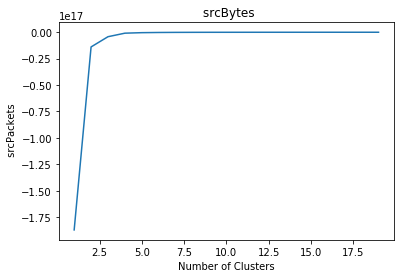

In [83]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(Y).score(Y) for i in range(len(kmeans))]
score
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel(' srcPackets')
pl.title(' srcBytes')
pl.show()

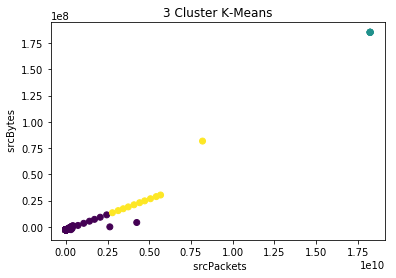

In [84]:
kmeans=KMeans(n_clusters=3)
kmeansoutput=kmeans.fit(Y)
kmeansoutput
pl.figure('3 Cluster K-Means')
pl.scatter(pca_c[:, 0], pca_d[:, 0], c=kmeansoutput.labels_)
pl.xlabel(' srcPackets')
pl.ylabel(' srcBytes')
pl.title('3 Cluster K-Means')
pl.show()

In [85]:
import pandas
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [86]:
credit = pd.read_csv("C:/HIRAL VASHI/COMODO/Data Science/netflow_day-02.csv",sep=",",index_col=False, nrows=500)
Y = credit[[' dstPackets']]
X = credit[[' dstBytes']]

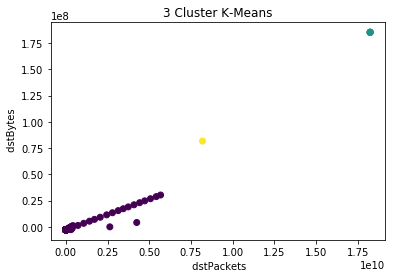

In [87]:
kmeans=KMeans(n_clusters=3)
kmeansoutput=kmeans.fit(Y)
kmeansoutput
pl.figure('3 Cluster K-Means')
pl.scatter(pca_c[:, 0], pca_d[:, 0], c=kmeansoutput.labels_)
pl.xlabel(' dstPackets')
pl.ylabel(' dstBytes')
pl.title('3 Cluster K-Means')
pl.show()